# Minimal Waveguide Example
In this example we show how to calculate the stationary paraxial field for a slab and cylindircal waveguide using PyPropagate.

In [1]:
from pypropagate import *

## Setting up the propagators
We begin by creating the settings for the propagator. We set a simulation box of size $1 \mu \text{m} \times 1 \mu \text{m} \times 0.5 \text{mm}$ and $1000 \cdot 1000 \cdot 500$ voxels and set initial and boundary conditions for a plane wave of $12 \text{keV}$.

In [2]:
settings = presets.create_paraxial_wave_equation_settings()
settings.simulation_box.set((0.5*units.um,0.5*units.um,0.5*units.mm),(500,500,500))
presets.set_plane_wave_initial_conditions(settings)
settings.wave_equation.set_energy(12*units.keV)

Our waveguide will consist of a vacuum core with a Titanium cladding. We can automatically lookup the refraction index for a compund material from [henke.lbl.gov](http://henke.lbl.gov) by providing chemical formula.

In [3]:
nVa = 1
nGe = presets.create_material('Ge',settings)

For a slab waveguide we will use a one dimensional and for a circular waveguide a two dimensional propagator. Since the one dimensional propagator assumes the values for $y = 0$ are valid everywhere we can define both waveguides with one formula. As the waveguide radius we choose $24\text{nm}$.

In [4]:
s = settings.symbols
settings.wave_equation.n = pc.piecewise((nVa,pc.sqrt(s.x**2+s.y**2) < 24*units.nm),(nGe,True))
settings.get_numeric(s.n)

piecewise(tuple(1,sqrt(x**2+y**2)<m*3/125e6),tuple(1/1e15*i*731935643+99999359143521/1e14,True))

## Slab Waveguide
We now calculate the stationary solution for the slab waveguide using the one dimensional finite differences propagator.

In [5]:
propagator = propagators.FiniteDifferencesPropagator1D(settings)


Simulation running. Step 500/500: 100% [██████████████████████████] [0.2 s] [eta 0s +- 0s]


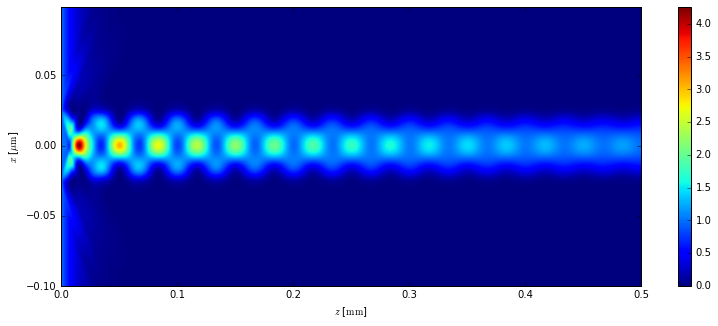

In [6]:
%matplotlib inline
plot(propagator.run_slice()[-0.1*units.um:0.1*units.um],figsize = (13,5));

## Cylindrical Waveguide
With the same settings we can calculate the solution for a cylindrical waveguide by using a two dimensional finite differences propagator. We calculate and plot the stationary solution at $y = 0$.

In [7]:
propagator = propagators.FiniteDifferencesPropagator2D(settings)


Simulation running. Step 500/500: 100% [█████████████████████████] [23.3 s] [eta 0s +- 0s]


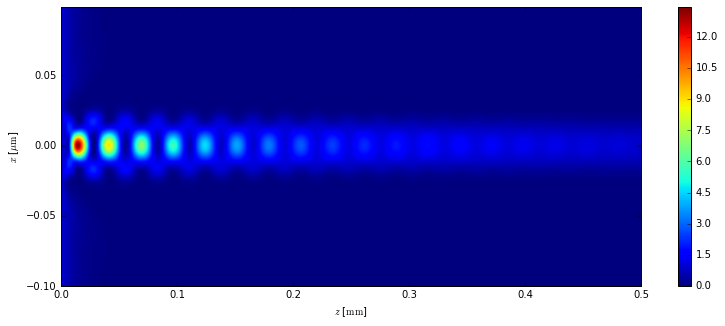

In [8]:
%matplotlib inline
plot(propagator.run_slice()[-0.1*units.um:0.1*units.um,0],figsize = (13,5));